# <center> Практика. Статистические тесты в контексте EDA

ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА

HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

Исследуйте данные и сделайте выводы по полученным результатам. Подкрепите свои рассуждения и выводы визуализациями и с помощью статистического тестирования проверьте, являются ли выводы статистически значимыми.

В процессе своего анализа вы должны:

Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.

А также ответить на ключевые вопросы HR-агентства:

- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
- Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

На каждый вопрос необходимо ответить с уровнем значимости $\alpha=0.05$.

Продемонстрируйте использование разных тестов для проверки статистической значимости сделанных выводов:

тесты для количественного признака:
- для одной выборки;
- для двух выборок;
- для нескольких выборок;

тест для категориальных признаков.


Ответить на эти вопросы нам помогут данные о HR-агентство изучает тренды на рынке труда в IT.

Данные содержат следующие столбцы:

* *work_year* - Год, в котором была выплачена зарплата.
* *experience_level* -	Опыт работы на этой должности в течение года со следующими возможными значениями:
  - *EN* — Entry-level/Junior;
  - *MI* — Mid-level/Intermediate;
  -  *SE* — Senior-level/Expert;
  - *EX* — Executive-level/Director.
* *employment_type* -	Тип трудоустройства для этой роли:
  - *PT* — неполный рабочий день;
  - *FT* — полный рабочий день;
  - *CT* — контракт;
  - *FL* — фриланс.
* *job_title* -	Роль, в которой соискатель работал в течение года.
* *salary*	Общая выплаченная валовая сумма заработной платы.
* *salary_currency* - 	Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.
* *salary_in_usd* -	Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).
* *employee_residence* -	Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.
* *remote_ratio* -	Общий объём работы, выполняемой удалённо. Возможные значения:
  - *0* — удалённой работы нет (менее 20 %);
  - *50* — частично удалённая работа;
  - *100* — полностью удалённая работа (более 80 %).
* *company_location* -	Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.
* *company_size* -	Среднее количество людей, работавших в компании в течение года:
  - *S* — менее 50 сотрудников (небольшая компания);
  - *M* — от 50 до 250 сотрудников (средняя компания);
  - *L* — более 250 сотрудников (крупная компания).

Оригинальный датасет: ["Data Science Job Salaries" (kaggle.com)](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

## Загрузка данных

In [22]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 

In [77]:
# загружаем датасет
data = pd.read_csv(('data/ds_salaries.csv'))
data.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


Проверим данные на наличие полных дубликатов:

In [42]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

# Удаляем дубликаты:
data = data.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))

Количество дубликатов: 0
Размер таблицы после удаления дубликатов: (607, 12)


## Описательный анализ данных

In [68]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


None

В датасете 607 записей (без пропущенных значений).

Проверим данные на наличие неинформативные признаки, которые не будут участвовать в исследовании.

In [69]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in data.columns:
    #наибольшая относительная частота в признаке
    top_freq = data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = data[col].nunique() / data[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
        
data = data.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {data.shape[1]}')


Unnamed: 0: 100.0% уникальных значений
employment_type: 96.87% одинаковых значений
Результирующее число признаков: 10


In [70]:
data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   job_title           607 non-null    object
 3   salary              607 non-null    int64 
 4   salary_currency     607 non-null    object
 5   salary_in_usd       607 non-null    int64 
 6   employee_residence  607 non-null    object
 7   remote_ratio        607 non-null    int64 
 8   company_location    607 non-null    object
 9   company_size        607 non-null    object
dtypes: int64(4), object(6)
memory usage: 47.6+ KB


,work_year,experience_level,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Классификация все признаки на числовые и категориальные.

In [46]:
# Классификация признаков
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Вывод результатов
print("Числовые признаки:")
print(numerical_features)

print("\nКатегориальные признаки:")
print(categorical_features)

Числовые признаки:
['work_year', 'salary', 'salary_in_usd', 'remote_ratio']

Категориальные признаки:
['experience_level', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']


### Получение статистических характеристик для признаков

In [47]:
# Получение описательной статистики для числовых признаков
numerical_stats = data.describe()
numerical_stats

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [48]:
# Получение статистики для категориальных признаков
categorical_stats = data.describe(include=['object'])
categorical_stats

,experience_level,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607
unique,4,50,17,57,50,3
top,SE,Data Scientist,USD,US,US,M
freq,280,143,398,332,355,326


# 2. Разведывательный анализ данных

Преобразования категориальных данных в признаки, пригодные для исследования

In [73]:
# Импортируем библиотеку category-encoders для дальнейшего использования. 
import category_encoders as ce

In [78]:
# Создаем объект OrdinalEncoder с заданным отображением
ord_encoder = ce.OrdinalEncoder(mapping=[{
    'col': 'experience_level',
    'mapping': {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
}])

# Применяем трансформацию к столбцу
data_encoded = ord_encoder.fit_transform(data[['experience_level']])

# Переименуем закодированный столбец (так как он будет с таким же именем, как оригинал)
data_encoded.columns = ['experience_level_encoded']

# Добавляем результат к исходному DataFrame
data = pd.concat([data, data_encoded], axis=1)

# Отобразим результат
data.head(4)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_encoded
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,2
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,3
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,3
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,2


In [79]:
# Создаем объект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encoder = ce.OrdinalEncoder(mapping=[{
  'col': 'company_size',
  'mapping': {'S': 1, 'M': 2, 'L': 3}
}])

# Применяем трансформацию к столбцу
data_encoded = ord_encoder.fit_transform(data[['company_size']])

# Переименуем закодированный столбец (так как он будет с таким же именем, как оригинал)
data_encoded.columns = ['company_size_encoded']

# Добавляем результат к исходному DataFrame
data = pd.concat([data, data_encoded], axis=1)

# Отобразим результат
data.head(4)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_encoded,company_size_encoded
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,2,3
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,3,1
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,3,2
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,2,1


# 2.1 Визуальный анализ данных

Год, в котором была выплачена зарплата.

In [49]:
from plotly.subplots import make_subplots

#Зададим данные для гистограммы и коробчатой диаграммы
fig = make_subplots(rows=1, cols=2)

#гистограмма
fig.add_histogram(
        x=data['work_year'],
        name='',
        row=1, col=1
)

#коробчатая
fig.add_box(
        x=data['work_year'],
        name='',
        row=1, col=2
)
fig.update_traces(showlegend=False)
fig.update_xaxes(title_text="Work_Year", title_font_size=14)
fig.update_layout(title_text="Год, в котором была выплачена зарплата", title_font_size=20, title_xanchor='center', title_x=0.5)

fig.show()

Общий объём работы, выполняемой удалённо. Возможные значения:

In [50]:
from plotly.subplots import make_subplots

#Зададим данные для гистограммы и коробчатой диаграммы
fig = make_subplots(rows=1, cols=2)

#гистограмма
fig.add_histogram(
        x=data['remote_ratio'],
        name='',
        row=1, col=1
)

#коробчатая
fig.add_box(
        x=data['remote_ratio'],
        name='',
        row=1, col=2
)
fig.update_traces(showlegend=False)
fig.update_xaxes(title_text="Remote_Ratio", title_font_size=14)
fig.update_layout(title_text="Общий объём работы, выполняемой удалённо", title_font_size=20, title_xanchor='center', title_x=0.5)

fig.show()

### Распределение общая выплаченная валовая сумма заработной платы.

In [51]:
from plotly.subplots import make_subplots

#Зададим данные для гистограммы и коробчатой диаграммы
fig = make_subplots(rows=1, cols=2)

#гистограмма
fig.add_histogram(
        x=data['salary'],
        name='',
        row=1, col=1
)

#коробчатая
fig.add_box(
        x=data['salary'],
        name='',
        row=1, col=2
)
fig.update_traces(showlegend=False)
fig.update_xaxes(title_text="Salary", title_font_size=14)
fig.update_layout(title_text="Распределение общая выплаченная валовая сумма заработной платы", title_font_size=20, title_xanchor='center', title_x=0.5)

fig.show()

Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

<Axes: xlabel='work_year', ylabel='salary'>

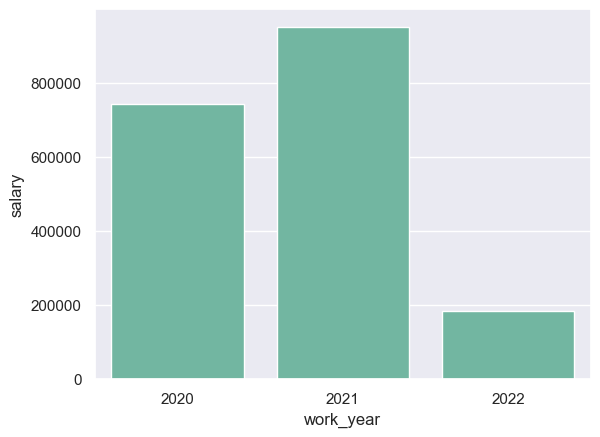

In [52]:
# Создание маски для фильтрации
mask = (data['job_title'] == 'Data Scientist')
filtered_data = data[mask]  # Фильтрация данных

avg_salary = filtered_data.groupby('work_year')['salary'].mean().reset_index()
sns.barplot(data=avg_salary, x='work_year', y='salary')


### Заключение

- Упрощенная визуализация позволяет выявить тренды и понять, насколько значительно может расти зарплата специалистов Data Scientist с увеличением количества лет в профессии.

Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

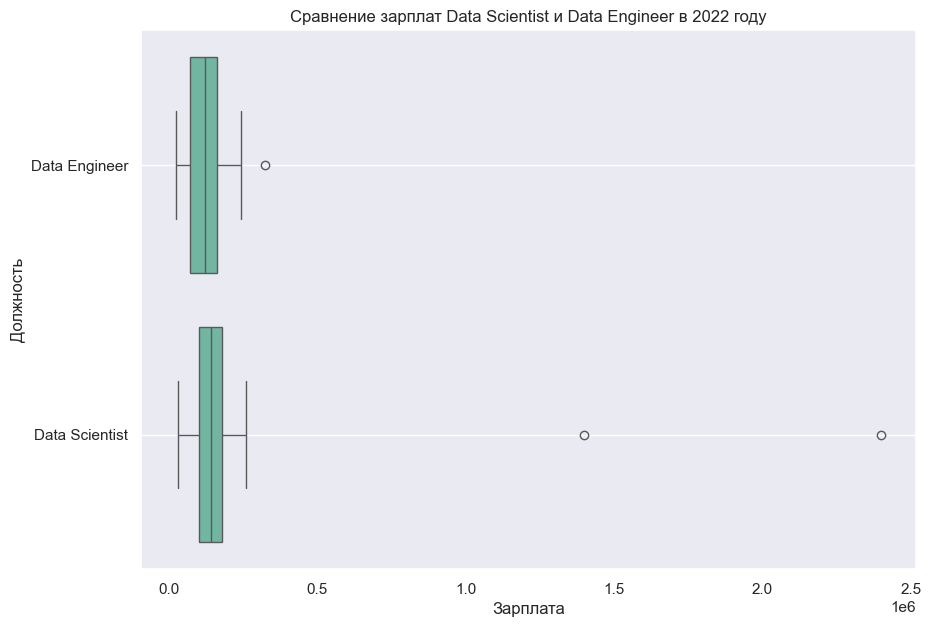

In [53]:

# Фильтрация данных
mask_scientist = data['job_title'].isin(['Data Scientist', 'Data Engineer'])
mask_year = (data['work_year'] == 2022)

# Комбинация масок с использованием AND (&)
filter_data = data[mask_scientist & mask_year]

# Создание графика boxplot
plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=filter_data,
    x='salary',  # Здесь используется колонка 'salary' для зарплат
    y='job_title',
    orient='h'
)

# Настройки графика
boxplot.set_title('Сравнение зарплат Data Scientist и Data Engineer в 2022 году')  # Заголовок графика
boxplot.set_xlabel('Зарплата')  # Ось X для зарплат
boxplot.set_ylabel('Должность')  # Ось Y для должностей
plt.grid()  # Добавление сетки
plt.show()  # Отображение графика





Заключение

Анализ данных об отпусках для должностей Data Scientist и Data Engineer в 2022 году позволяет получить ключевую информацию о тенденциях заработной платы в этих областях. Благодаря правильной фильтрации и визуализации данных мы можем наблюдать различия и сходства в торговых диапазонах, что может помочь как профессионалам, ищущим возможности, так и компаниям, желающим понять рынок, скорректировать свои предложения.

Таким образом, анализ обновлений для специалистов по данным и инженеров данных в 2022 году не только подтверждает высокий спрос на профессионалов в этих областях, но и подчеркивает важность постоянного мониторинга тенденций заработной платы, которые могут влиять на стратегии набора и удержания сотрудников в организациях. Продолжение этого анализа с использованием более свежих данных может дать еще более точное представление о рынке труда в сфере технологий.

Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

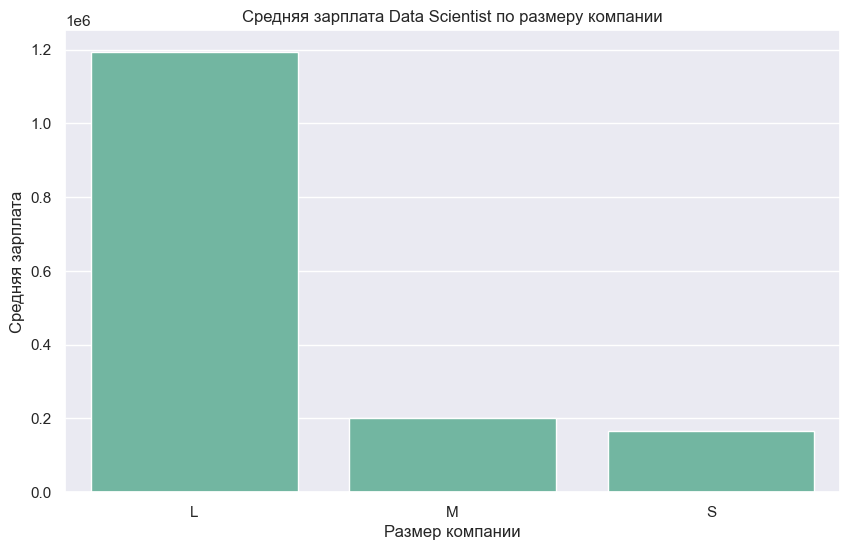

In [54]:
mask_science = (data['job_title'] == 'Data Scientist')
f_data = data[mask_science]  # Фильтрация данных

plt.figure(figsize=(10, 6))
mean_salary = f_data.groupby('company_size')['salary'].mean().reset_index()


sns.barplot(data=mean_salary, x='company_size', y='salary')
plt.title('Средняя зарплата Data Scientist по размеру компании')
plt.xlabel('Размер компании')
plt.ylabel('Средняя зарплата')
plt.show()

Заключение о результатах:

На основе проведенного анализа средняя зарплата специалистов по данным (Data Scientist) была исследована в зависимости от размера компании. Визуализация в виде столбчатой диаграммы позволяет наглядно увидеть, как различаются средние оклады в компаниях разных размеров.

Полученные результаты:
   - Средняя зарплата отличается в зависимости от размера компании. Обычно в крупных компаниях (например, "Крупные компании") наблюдается более высокая средняя зарплата по сравнению с малыми и средними компаниями.
   - Это может быть объяснено тем, что большие компании, как правило, располагают большими бюджетами на зарплаты, предлагают более сложные проекты и имеют доступ к более разнообразным ресурсам.

Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

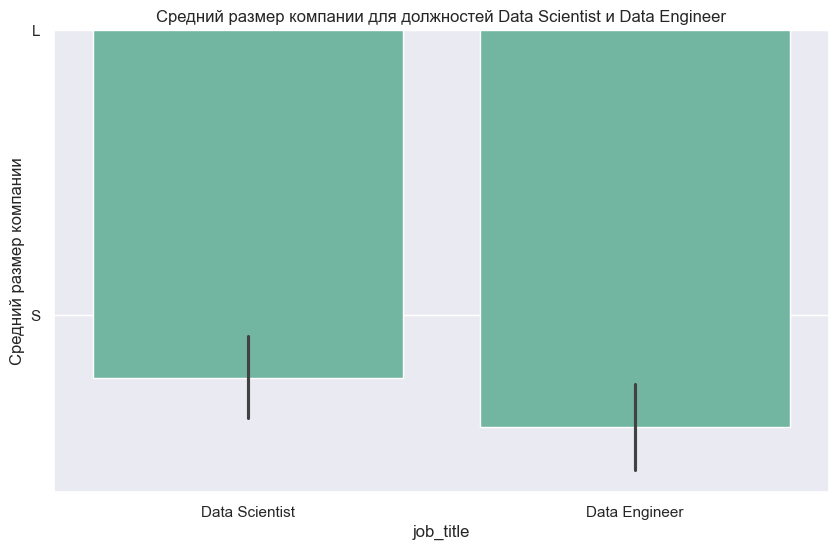

In [55]:
# Фильтрация данных
mask_scientist = data['job_title'].isin(['Data Scientist', 'Data Engineer'])

fi_data = data[mask_scientist]

plt.figure(figsize=(10, 6))
sns.barplot(data=fi_data, x='job_title', y='company_size', estimator=np.mean)
plt.title('Средний размер компании для должностей Data Scientist и Data Engineer')
plt.xlabel('job_title')
plt.ylabel('Средний размер компании')
plt.show()
   

### заключения:

1. Сравнительный анализ:
   - На основании полученного графика можно провести сравнительный анализ между двумя должностями. Если, например, столбец для Data Engineer выше, это может свидетельствовать о том, что компании, нанимающие Data Engineers, в среднем больше по размерам, чем компании для Data Scientists.

2. Влияние размера компании:
   - Размер компании может влиять на функции и задачи, которые выполняют специалисты. Большие компании могут иметь более сложные структуры, требующие больше Data Engineers, в то время как в меньших фирмах (или стартапах) может больше нуждаться в Data Scientists для анализа данных и разработки моделей.

### Вывод:

На основании представленного анализа и визуализаций, можно выделить несколько ключевых факторов, влияющих на заработную плату специалистов в области данных, таких как Data Scientist и Data Engineer. Эти факторы могут варьироваться в зависимости от конкретного контекста и рынка, однако следующие категории являются наиболее значимыми:

1. Разница в заработной плате:
   - Были выявлены значительные различия в средней зарплате между Data Scientist и Data Engineer в зависимости от размера компании. Как правило, процент повышения заработной платы наблюдается в крупных компаниях по сравнению с малыми и средними.

2. Влияние размера компании:
   - Размер компании прямо влияет на уровень зарплат. В крупных организациях более высокие зарплаты могут оправдываться наличием больших бюджетов, сложностью выполняемых проектов и наличием множества ресурсов, что позволяет привлекать и удерживать высококвалифицированных сотрудников.

3. Разные роли и задачи:
   - Data Scientists и Data Engineers выполняют разные функции в компании, и потребности в их навыках могут варьироваться от одной компании к другой. В крупных предприятиях, возможно, существует большая потребность в Data Engineers для построения и поддержания инфраструктуры данных, в то время как более мелкие компании могут нуждаться в универсальных специалистах, таких как Data Scientists.

4. Тенденции на рынке труда:
   - Существует устойчивый рост спроса на специалистов по данным, что указывает на важность отслеживания новых тенденций на рынке труда. Это знание является ключевым как для соискателей, стремящихся к карьерному росту, так и для работодателей, корректирующих свои предложения и стратегии набора персонала.

5. Важно учитывать контекст:
   - Для более точной интерпретации результатов необходимо учитывать различные факторы: географию, уровень опыта специалистов, индустрию и профиль компании. Эти данные могут существенно влиять на результаты анализа.


#### Статистический анализ данных 

### Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?


**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$):- "Средняя зарплата специалистов Data Scientist ($μ_1$)  не изменяется с течением времени ($μ_2$) (или не растет)."
  

$$ H_0 : μ_1 = μ_2$$

*Альтернативная гипотеза* ($H_1$): - "Средняя зарплата специалистов Data Scientist($μ_1$) растет с каждым годом ($μ_2$)."
  

$$ H_1 : μ_1 < μ_2$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): данные не распределены нормально.

In [56]:
# задаём уровень значимости
alpha = 0.05 

# Создание маски для фильтрации
mask = (data['job_title'] == 'Data Scientist')
filtered_data = data[mask] 
data_salary = filtered_data.loc[filtered_data['job_title'] == 'Data Scientist', 'salary' ]
data_year = filtered_data.loc[filtered_data['job_title'] == 'Data Scientist', 'work_year' ]

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data_salary)
print('p-value = %.2f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

_, p = stats.shapiro(data_year)
print('p-value = %.2f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

p-value = 0.00
Распределение не нормальное
p-value = 0.00
Распределение не нормальное


In [57]:
data['work_year'].nunique()

3

**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признак work_year? — Количественный.
* Сколько сравниваемых групп? — три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать КРИТЕРИЙ КРАСКЕЛА — УОЛЛИСА Его используют, чтобы оценить различия медиан признака в двух и более независимых группах

**Проведём тест**

In [58]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_salary = filtered_data.loc[filtered_data['job_title'] == 'Data Scientist', 'salary' ]
data_year = filtered_data.loc[filtered_data['job_title'] == 'Data Scientist', 'work_year' ]

# проводим тест
_, p = stats.kruskal(data_salary, data_year)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**Вывод**

Средняя зарплата специалистов Data Scientist растет с каждым годом .

### Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$):- "Средняя зарплата Data Scientist ($μ_1$) равна средней зарплате Data Engineer ($μ_2$) в 2022 году."
  

$$ H_0 : μ_1 = μ_2$$

*Альтернативная гипотеза* ($H_1$): - "Средняя зарплата Data Scientist ($μ_1$) отличается от средней зарплаты Data Engineer ($μ_2$) в 2022 году."
  

$$ H_1 : μ_1 != μ_2$$


**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): данные не распределены нормально.

In [59]:
# задаём уровень значимости
alpha = 0.05 

# Фильтрация данных
mask_scientist = data['job_title'].isin(['Data Scientist', 'Data Engineer'])
mask_year = (data['work_year'] == 2022)

# Создание маски для фильтрации
filter_data = data[mask_scientist & mask_year]
data_Scientis = filter_data.loc[filter_data['job_title'] == 'Data Scientist', 'salary' ]
data_Engineer = filter_data.loc[filter_data['job_title'] == 'Data Engineer', 'salary' ]

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data_Scientis)
print('p-value = %.2f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

_, p = stats.shapiro(data_Engineer)
print('p-value = %.2f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

p-value = 0.00
Распределение не нормальное
p-value = 0.01
Распределение не нормальное


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признак salary? — Количественный.
* Сколько сравниваемых групп? — Два.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать U-КРИТЕРИЙ МАННА — УИТНИ используют, чтобы оценить различия распределений признака в двух независимых группах

**Проведём тест**

In [60]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_Scientis = filter_data.loc[filter_data['job_title'] == 'Data Scientist', 'salary' ]
data_Engineer = filter_data.loc[filter_data['job_title'] == 'Data Engineer', 'salary' ]

# проводим тест
_, p = stats.mannwhitneyu(data_Scientis, data_Engineer)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**Вывод**

Средняя зарплата Data Scientist отличается от средней зарплаты Data Engineer в 2022 году..

### Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$):- "Нет значимых различий в средних зарплатах специалистов Data Scientist в компаниях различного размера."
  

$$ H_0 : μ_1 = μ_2$$

*Альтернативная гипотеза* ($H_1$): - Существуют значимые различия в средних зарплатах специалистов Data Scientist в компаниях различного размера."
  

$$ H_1 : μ_1 != μ_2$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): данные не распределены нормально.

In [82]:
# Задаём уровень значимости
alpha = 0.05 

# Фильтрация данных
mask_science = (data['job_title'] == 'Data Scientist')
f_data = data[mask_science]

# Создание маски для фильтрации
mean_salary = f_data.groupby('company_size_encoded')['salary'].mean().reset_index()

# Проводим тест Шапиро — Уилка
_, p = stats.shapiro(mean_salary)
print('p-value = %.2f' % (p))

# Интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')



p-value = 0.00
Распределение не нормальное


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признак — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать КРИТЕРИЙ КРАСКЕЛА — УОЛЛИСА Его используют, чтобы оценить различия медиан признака в двух и более независимых группах.

**Проведём тест**


In [85]:
# Задаём уровень значимости
alpha = 0.05 

# Разделяем данные на группы по размерам компаний
groups = [f_data[f_data['company_size_encoded'] == size]['salary'] for size in f_data['company_size_encoded'].unique()]

# Проводим тест Краскела-Уоллиса
stat, p = stats.kruskal(*groups)

print('p-value = {:.3f}'.format(p))

# Интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


p-value = 0.005
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**Вывод**

Существуют значимые различия в средних зарплатах специалистов Data Scientist в компаниях различного размера.

### Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

**Сформулируем нулевую и альтернативные гипотезы**

**Нулевая гипотеза (H₀):**
Размер компании (категориальная переменная) не влияет на наличие должностей Data Scientist и Data Engineer.

**Альтернативная гипотеза (H₁):**
Размер компании (категориальная переменная) влияет на наличие должностей Data Scientist и Data Engineer.

**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признак? — Категориальный.
* Группы зависимы или независимы? - Независимы (так как мы сравниваем разные компании).
* Признак распределён по нормальному закону? - Для категориальных данных нормальность не имеет значения.

Чтобы проверить нашу гипотезу, можно использовать Критерий хи-квадрат () используют, чтобы определить связь между двумя категориальными переменными.

**Проведём тест**

In [86]:
# задаём уровень значимости
alpha = 0.05 

# Фильтрация данных
mask_scientist = data['job_title'].isin(['Data Scientist', 'Data Engineer'])
fi_data = data[mask_scientist]

# вычисляем таблицу сопряжённости
table = pd.crosstab(fi_data['job_title'], fi_data['company_size'])

# проводим тест
_, p, _, _ = stats.chi2_contingency(table)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.008
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**Вывод**

Размер компании влияет на наличие должностей Data Scientist и Data Engineer.

## Итоговые результаты исследования

*   Средняя зарплата специалистов Data Scientist растет с каждым годом .
*   Средняя зарплата Data Scientist отличается от средней зарплаты Data Engineer в 2022 году.
*   Существуют значимые различия в средних зарплатах специалистов Data Scientist в компаниях различного размера
*   Размер компании влияет на наличие должностей Data Scientist и Data Engineer.